# PCA Algorithm Implementation 

## Tutorial 1, Artificial Intelligence and Data Science 

### Soham Sahasrabuddhe
### 23B1848

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler

## Defination of the PCA function


In [2]:
def PCA(X,epsilon):
    # Standardising the data
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_standardized = (X - mean) / std

    # Computing covariance, eigenvalues and corresponding eigenvectors
    cov = X_standardized.T @ X_standardized/len(X[:,0])
    eigen_values = np.linalg.eigvals(cov)
    eigen_vectors = np.linalg.eig(cov)[1]

    # Cleaning of data for provided epsilon
    delete_indices = []
    for i in range(len(eigen_values)):
        if eigen_values[i] < epsilon:
            delete_indices.append(i)

    # Computing new dataset X_new using updated eigenvalues and eigenvectors
    eigen_vectors = np.delete(eigen_vectors, delete_indices, axis=1)
    eigen_values = np.delete(eigen_values, delete_indices)
    X_new = X @ eigen_vectors

    return X_new,eigen_values,eigen_vectors

### Loading the IRIS datafile

In [3]:
file_path = 'iris.data'
iris_file = pd.read_csv(file_path, header=None)
iris_file.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
print(iris_file)

     sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


## Question 1

In [4]:
X = np.column_stack((iris_file['petal length'], iris_file['petal width']))

### Part(a)

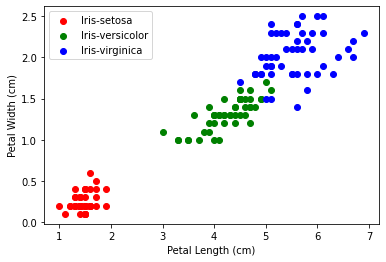

In [5]:
petal_length = X[:,0]
petal_width = X[:,1]

class_colors = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}

for label, color in class_colors.items():
    class_mask = np.array(iris_file['class']) == label
    plt.scatter(petal_length[class_mask], petal_width[class_mask], c=color, label=label)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

### Part(b)

In [6]:
epsilon = float(input())
print(epsilon)

0.0


In [7]:
X = np.column_stack((iris_file['petal length'], iris_file['petal width']))
Z = PCA(X,epsilon)

In [8]:
print(f' New Dataset = {Z[0]}')
print(f'Updated eigenvalues = {Z[1]}')
print(f'Updated eigenvectors = {Z[2]}')

 New Dataset = [[ 1.13137085 -0.84852814]
 [ 1.13137085 -0.84852814]
 [ 1.06066017 -0.77781746]
 [ 1.20208153 -0.91923882]
 [ 1.13137085 -0.84852814]
 [ 1.48492424 -0.91923882]
 [ 1.20208153 -0.77781746]
 [ 1.20208153 -0.91923882]
 [ 1.13137085 -0.84852814]
 [ 1.13137085 -0.98994949]
 [ 1.20208153 -0.91923882]
 [ 1.27279221 -0.98994949]
 [ 1.06066017 -0.91923882]
 [ 0.84852814 -0.70710678]
 [ 0.98994949 -0.70710678]
 [ 1.34350288 -0.77781746]
 [ 1.20208153 -0.6363961 ]
 [ 1.20208153 -0.77781746]
 [ 1.41421356 -0.98994949]
 [ 1.27279221 -0.84852814]
 [ 1.34350288 -1.06066017]
 [ 1.34350288 -0.77781746]
 [ 0.84852814 -0.56568542]
 [ 1.55563492 -0.84852814]
 [ 1.48492424 -1.20208153]
 [ 1.27279221 -0.98994949]
 [ 1.41421356 -0.84852814]
 [ 1.20208153 -0.91923882]
 [ 1.13137085 -0.84852814]
 [ 1.27279221 -0.98994949]
 [ 1.27279221 -0.98994949]
 [ 1.34350288 -0.77781746]
 [ 1.13137085 -0.98994949]
 [ 1.13137085 -0.84852814]
 [ 1.13137085 -0.98994949]
 [ 0.98994949 -0.70710678]
 [ 1.06066017

### Part(c)

In [9]:
print("Enter Value of epsilon")
epsilon = float(input())
print(epsilon)

Enter Value of epsilon
0.0


In [10]:
X = np.column_stack((iris_file['petal length'], iris_file['petal width'],iris_file['sepal length'],iris_file['sepal width']))
Z = PCA(X,epsilon)

In [11]:
print(f' New Dataset = {Z[0]}')
print(f'Updated eigenvalues = {Z[1]}')
print(f'Updated eigenvectors = {Z[2]}')

 New Dataset = [[ 2.66923088e+00  1.15201064e-01 -2.50606121e+00  5.18088722e+00]
 [ 2.69643401e+00  1.05532777e-01 -2.48287429e+00  4.64364530e+00]
 [ 2.48116330e+00  1.02643429e-01 -2.30435358e+00  4.75218345e+00]
 [ 2.57151243e+00  2.76660361e-01 -2.22827673e+00  4.62661492e+00]
 [ 2.59065822e+00  1.53814104e-01 -2.40975624e+00  5.23621104e+00]
 [ 3.00809881e+00  2.21893339e-01 -2.45652515e+00  5.68221692e+00]
 [ 2.49094166e+00  1.81430750e-01 -2.10637596e+00  4.90871397e+00]
 [ 2.70145461e+00  2.09102569e-01 -2.44407359e+00  5.05320922e+00]
 [ 2.46158369e+00  2.24117089e-01 -2.14656917e+00  4.36493047e+00]
 [ 2.67166282e+00  2.50416312e-01 -2.50796192e+00  4.73176885e+00]
 [ 2.83139678e+00  1.41544777e-01 -2.65987045e+00  5.47980351e+00]
 [ 2.65510568e+00  3.41617113e-01 -2.28578101e+00  4.98085502e+00]
 [ 2.58763574e+00  1.84086963e-01 -2.47415275e+00  4.59987189e+00]
 [ 2.15207373e+00  7.47384753e-02 -2.15591202e+00  4.40738428e+00]
 [ 2.78696275e+00 -1.66359295e-01 -2.91793499e+

## Question 2
### Kernel PCA

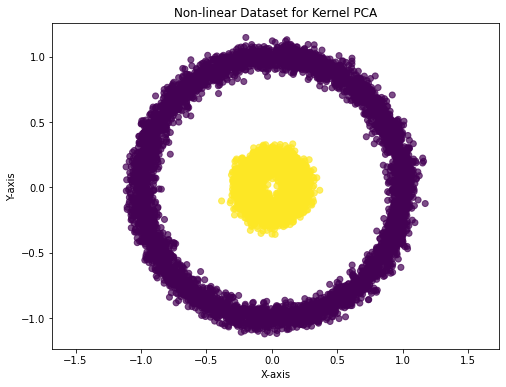

In [3]:
X,Y = make_circles(n_samples=10000, factor=0.2, noise=0.05, random_state=1)
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0],X[:,1], c=Y, alpha=0.7)
plt.title("Non-linear Dataset for Kernel PCA")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.axis('equal')
plt.show()

In [4]:
Z = PCA(X,0.1)
print(Z)

(array([[ 0.13953259, -0.15489367],
       [-0.56505455, -0.77474319],
       [ 0.64061446, -0.75635504],
       ...,
       [ 0.84419344,  0.32497194],
       [ 0.1471692 , -0.14202496],
       [ 0.91088864, -0.41022314]]), array([1.0012383, 0.9987617]), array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))


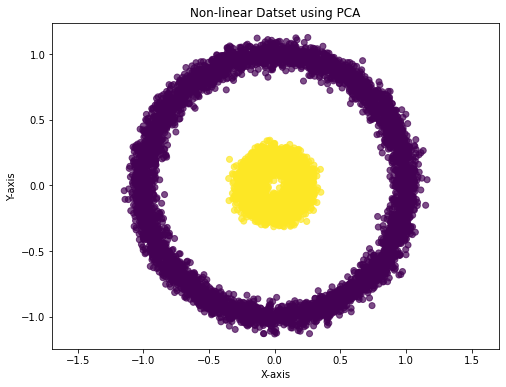

In [5]:
# Define the figure and axis with a specified size
fig, ax = plt.subplots(figsize=(8, 6))

# Extract the x and y coordinates from the array
x, y = Z[0][:, 0], Z[0][:, 1]

# Plot the dataset with a scatter plot
ax.scatter(x, y, c=Y, alpha=0.7, label='Data Points')

# Set the title and labels for the plot
ax.set_title("Non-linear Datset using PCA")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

# Ensure the axis are equal to maintain aspect ratio
ax.axis('equal')

# Show the plot
plt.show()

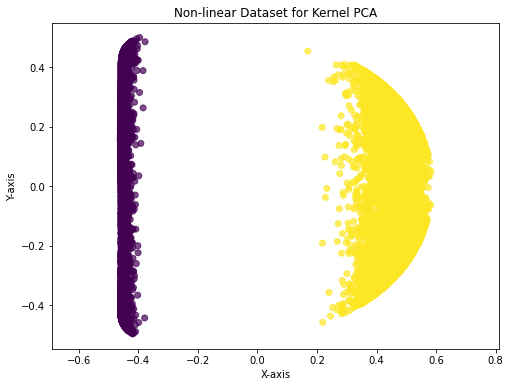

In [6]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=1)
X_kpca = kpca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[:,0],X_kpca[:,1], c=Y, alpha=0.7)
plt.title("Non-linear Dataset for Kernel PCA")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.axis('equal')
plt.show()

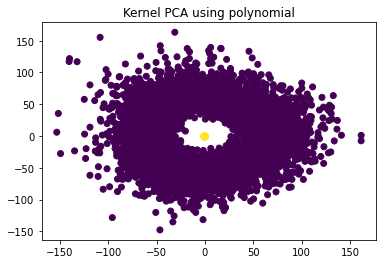

In [7]:
kpca = KernelPCA(n_components=2,kernel='poly', degree=9, coef0=1)
X_kpca = kpca.fit_transform(X_scaled)

plt.title("Kernel PCA using polynomial")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=Y)
plt.show()
